In [1]:
# Import libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# Loading data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
train_data.shape , test_data.shape

((42000, 785), (28000, 784))

In [4]:
# Separate labels and features
X = train_data.drop(columns=['label'], axis=1)
y = train_data['label']

In [5]:
# Normalize features
X = X.astype('float32') / 255.0

test_data = test_data.astype('float32') / 255.0

In [6]:
# Splitting data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [7]:
# Convert dataframes to numpy arrays
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values
test_data = test_data.values

In [8]:
# Reshape numpy arrays for 2D format 28x28

X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

test_data = test_data.reshape(-1, 28, 28, 1)

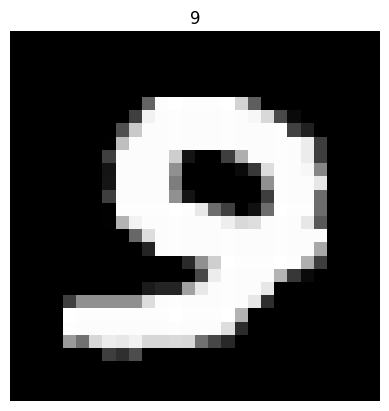

In [9]:
# Visualising data and labels
plt.imshow(X_train[3], cmap='gray')
plt.title(y_train[3])
plt.axis('off')
plt.show()

In [10]:
# Import libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score

In [11]:
# One hot encoding for labels
Y_train_cat = to_categorical(y_train)
Y_test_cat = to_categorical(y_test)

In [12]:
# Define Convolutional NN 
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    
    Flatten(),
    
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


In [13]:
# Compiling model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
# Training the model
history = model.fit(
    X_train, Y_train_cat,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    verbose = 1,
)

Epoch 1/10
840/840 [==============================] - 7s 7ms/step - loss: 0.2686 - accuracy: 0.9183 - val_loss: 0.0601 - val_accuracy: 0.9830
Epoch 2/10
840/840 [==============================] - 5s 6ms/step - loss: 0.1031 - accuracy: 0.9703 - val_loss: 0.0462 - val_accuracy: 0.9868
Epoch 3/10
840/840 [==============================] - 6s 7ms/step - loss: 0.0727 - accuracy: 0.9788 - val_loss: 0.0564 - val_accuracy: 0.9850
Epoch 4/10
840/840 [==============================] - 5s 7ms/step - loss: 0.0617 - accuracy: 0.9823 - val_loss: 0.0724 - val_accuracy: 0.9796
Epoch 5/10
840/840 [==============================] - 5s 6ms/step - loss: 0.0525 - accuracy: 0.9843 - val_loss: 0.0532 - val_accuracy: 0.9860
Epoch 6/10
840/840 [==============================] - 5s 6ms/step - loss: 0.0500 - accuracy: 0.9855 - val_loss: 0.0439 - val_accuracy: 0.9884
Epoch 7/10
840/840 [==============================] - 5s 6ms/step - loss: 0.0425 - accuracy: 0.9884 - val_loss: 0.0922 - val_accuracy: 0.9778
Epoch 

In [18]:
# Evaluating model
test_loss, test_accuracy = model.evaluate(X_test, Y_test_cat, verbose=2)
print(f'Test accuracy:, {test_accuracy:.2f}')

263/263 - 1s - loss: 0.0558 - accuracy: 0.9867 - 655ms/epoch - 2ms/step
Test accuracy:, 0.99


In [16]:
# Predictions for test_data

predictions = model.predict(test_data)
predicted_labels = np.argmax(predictions, axis=1)

875/875 [==============================] - 2s 2ms/step
